# Test the binary model using the Mel scale

The test ouputs the fraction of the test samples which have been correctly classified

In [5]:
from keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_generator = ImageDataGenerator(preprocessing_function=None)
from sklearn.metrics import classification_report

# model = my_model
model = load_model("../models/model-binary-mel")

# generate data for test set of images
test_generator = data_generator.flow_from_directory(
        "/home/lorenzo/Pictures/test-dataset/binary-seg/",
        target_size=(128, 256),
        color_mode='grayscale',
        batch_size=1,
        class_mode='categorical',
        shuffle=False)

filenames=test_generator.filenames
n_test = len(filenames)

# obtain predicted activation values for the last dense layer
test_generator.reset()
pred=model.predict(test_generator, verbose=1, steps=n_test)

# determine the maximum activation value for each sample
predicted_class_indices=np.argmax(pred,axis=1)
actual_labels=test_generator.labels
class_labels = list(test_generator.class_indices.keys())

# determine the test set accuracy
match=[]
for i in range(0, n_test):
    match.append(predicted_class_indices[i]==actual_labels[i])

acc = str(match.count(True) / n_test * 100)[0:4]
print(f"The model predicted accurately {acc}% of the samples")
print(classification_report(actual_labels, predicted_class_indices))

Found 7752 images belonging to 2 classes.
7752/7752 [==============================] - 14s 2ms/step
The model predicted accurately 82.7% of the samples
              precision    recall  f1-score   support

           0       0.70      0.93      0.80      2847
           1       0.95      0.77      0.85      4905

    accuracy                           0.83      7752
   macro avg       0.82      0.85      0.82      7752
weighted avg       0.86      0.83      0.83      7752



# Test the multi-class model using the Mel scale

In [3]:
from keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_generator = ImageDataGenerator(preprocessing_function=None)
from sklearn.metrics import classification_report

model = load_model("../models/model-4c-mel")

# generate data for test set of images
test_generator = data_generator.flow_from_directory(
        "/home/lorenzo/Pictures/test-dataset/4c-seg/",
        target_size=(128, 256),
        color_mode='grayscale',
        batch_size=1,
        class_mode='categorical',
        shuffle=False)

filenames=test_generator.filenames
n_test = len(filenames)

# obtain predicted activation values for the last dense layer
test_generator.reset()
pred=model.predict(test_generator, verbose=1, steps=n_test)

# determine the maximum activation value for each sample
predicted_class_indices=np.argmax(pred,axis=1)
actual_labels=test_generator.labels
class_labels = list(test_generator.class_indices.keys())

# determine the test set accuracy
match=[]
for i in range(0, n_test):
    match.append(predicted_class_indices[i]==actual_labels[i])

acc = str(match.count(True) / n_test * 100)[0:4]
print(f"The model predicted accurately {acc}% of the samples")
print(classification_report(actual_labels, predicted_class_indices))

Found 4905 images belonging to 4 classes.
4905/4905 [==============================] - 8s 2ms/step
The model predicted accurately 75.1% of the samples
              precision    recall  f1-score   support

           0       0.82      0.73      0.77      2105
           1       0.94      0.63      0.76      1540
           2       0.55      1.00      0.71       759
           3       0.67      0.83      0.74       501

    accuracy                           0.75      4905
   macro avg       0.75      0.80      0.74      4905
weighted avg       0.80      0.75      0.75      4905



# For the model with four classes, plot the confusion matrix

/tmp/ipykernel_27111/959668215.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(['', 'double', 'half', 'quad', 'quarter'])
/tmp/ipykernel_27111/959668215.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_ticklabels(['', 'double', 'half', 'quad', 'quarter'])


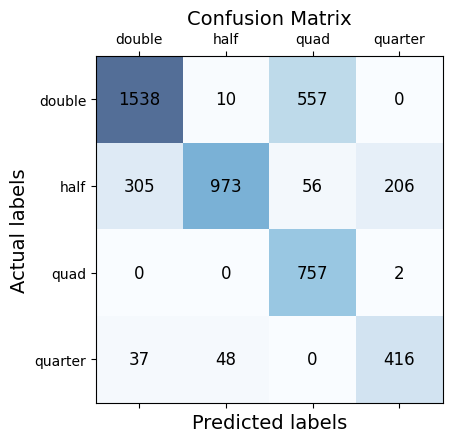

In [4]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_true=actual_labels, y_pred=predicted_class_indices)

fig, ax = plt.subplots(figsize=(4.5, 4.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.7)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='large')

plt.xlabel('Predicted labels', fontsize=14)
plt.ylabel('Actual labels', fontsize=14)
ax.xaxis.set_ticklabels(['', 'double', 'half', 'quad', 'quarter'])
ax.yaxis.set_ticklabels(['', 'double', 'half', 'quad', 'quarter'])
plt.title('Confusion Matrix', fontsize=14)
plt.savefig("confusion_matrix.png", dpi=300)
plt.show()